In [1]:
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymo

In [2]:
players <- read_csv("players.csv")

players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
sessions <- read_csv("sessions.csv")

sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
new_players <- players |>
select(experience, subscribe, played_hours, gender, Age)
new_players

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,0.0,Prefer not to say,17
Amateur,FALSE,2.3,Male,17
Pro,TRUE,0.2,Other,NA


In [5]:
new_players$experience[new_players$experience == "Pro"] <- 4

new_players$experience[new_players$experience == "Veteran"] <- 5

new_players$experience[new_players$experience == "Amateur"] <- 1

new_players$experience[new_players$experience == "Regular"] <- 3

new_players$experience[new_players$experience == "Beginner"] <- 2

In [6]:
newest_players <- new_players |>
mutate(gender = as_factor(gender), subscribe = as_factor(subscribe),
      experience = as.integer(as_factor(experience)))

newest_players

experience,subscribe,played_hours,gender,Age
<int>,<fct>,<dbl>,<fct>,<dbl>
1,TRUE,30.3,Male,9
2,TRUE,3.8,Male,17
2,FALSE,0.0,Male,17
⋮,⋮,⋮,⋮,⋮
3,FALSE,0.0,Prefer not to say,17
3,FALSE,2.3,Male,17
1,TRUE,0.2,Other,NA


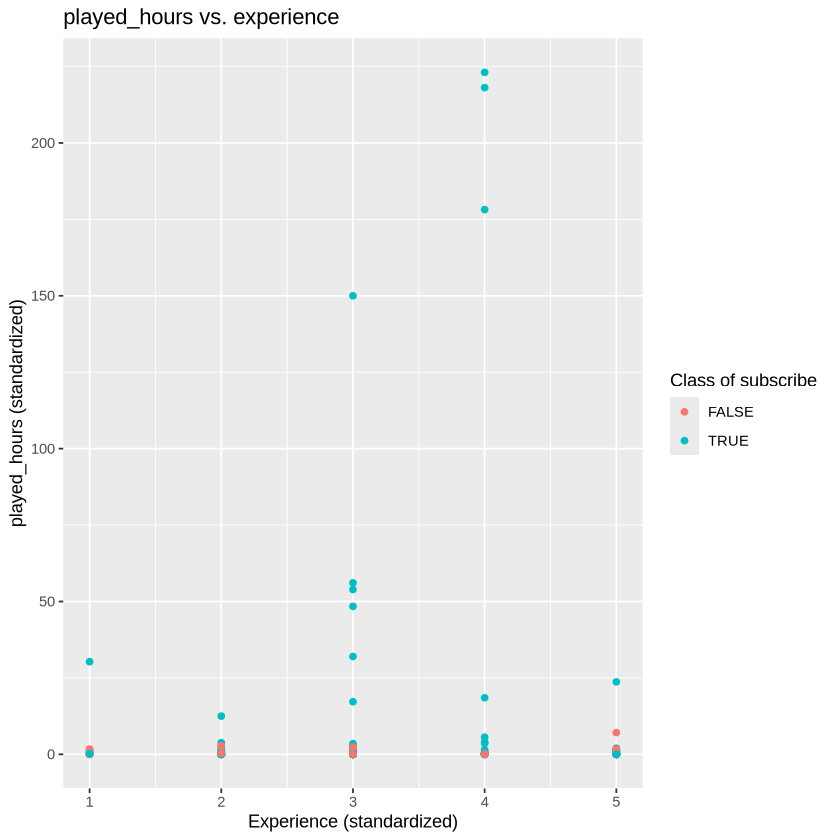

In [7]:
experience_played_hours_plot <- newest_players |>
   ggplot(aes(x = experience, y = played_hours, color = subscribe)) + 
   geom_point() + 
   xlab("Experience (standardized)") +
   ylab("played_hours (standardized)") +
   ggtitle("played_hours vs. experience") +
   labs(color = "Class of subscribe")

experience_played_hours_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


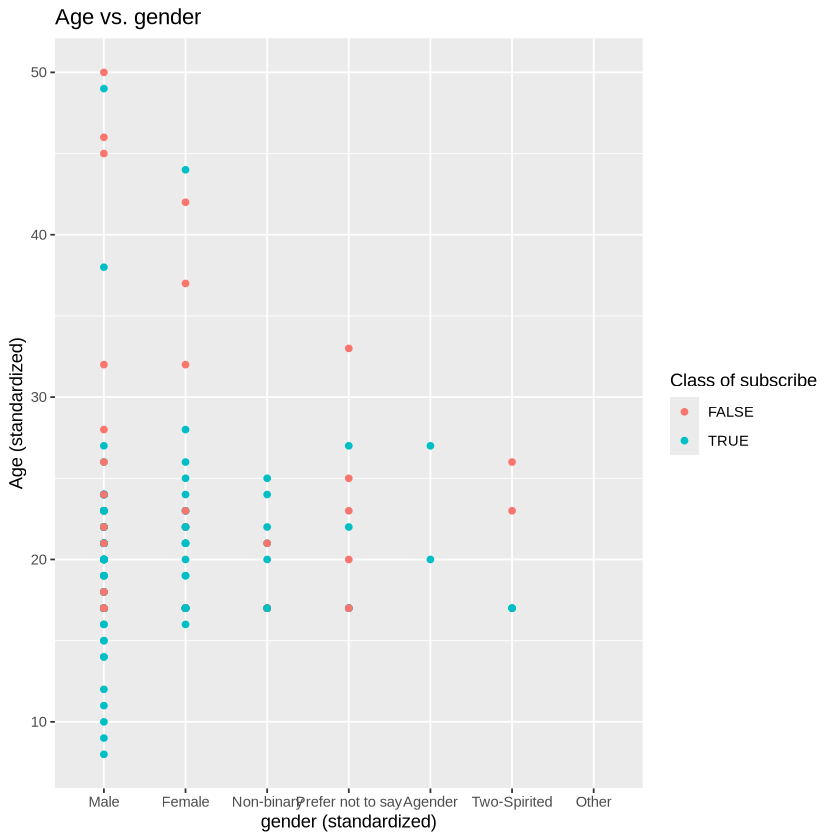

In [8]:
gender_Age_plot <- newest_players |>
   ggplot(aes(x = gender, y = Age, color = subscribe)) + 
   geom_point() + 
   xlab("gender (standardized)") +
   ylab("Age (standardized)") +
   ggtitle("Age vs. gender") +
   labs(color = "Class of subscribe")

gender_Age_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


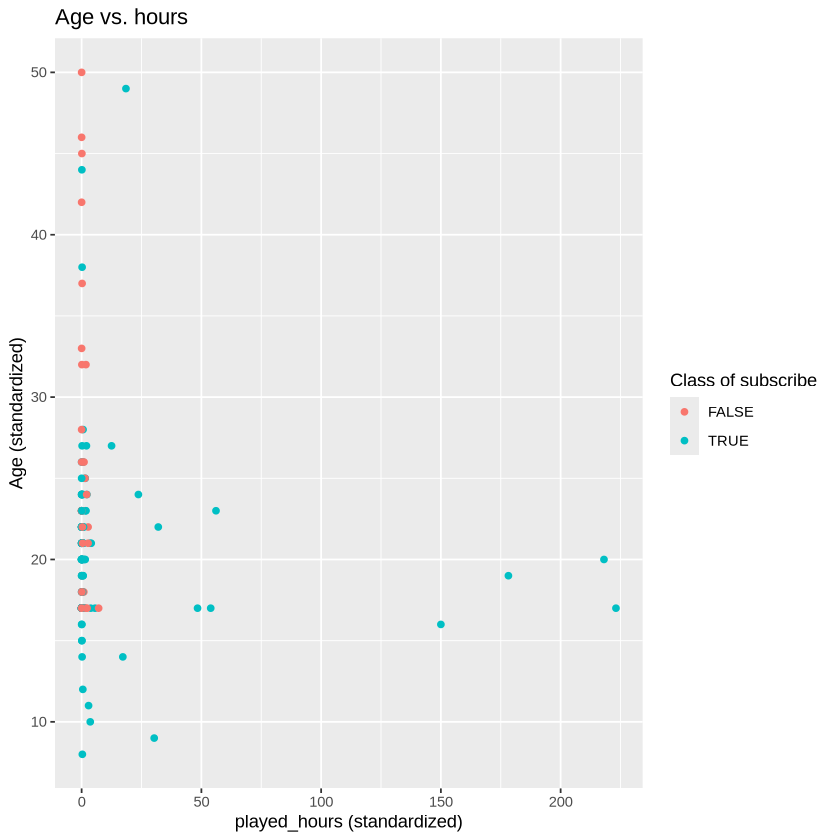

In [9]:
played_hours_Age_plot <- newest_players |>
   ggplot(aes(x = played_hours, y = Age, color = subscribe)) + 
   geom_point() + 
   xlab("played_hours (standardized)") +
   ylab("Age (standardized)") +
   ggtitle("Age vs. hours") +
   labs(color = "Class of subscribe")

played_hours_Age_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


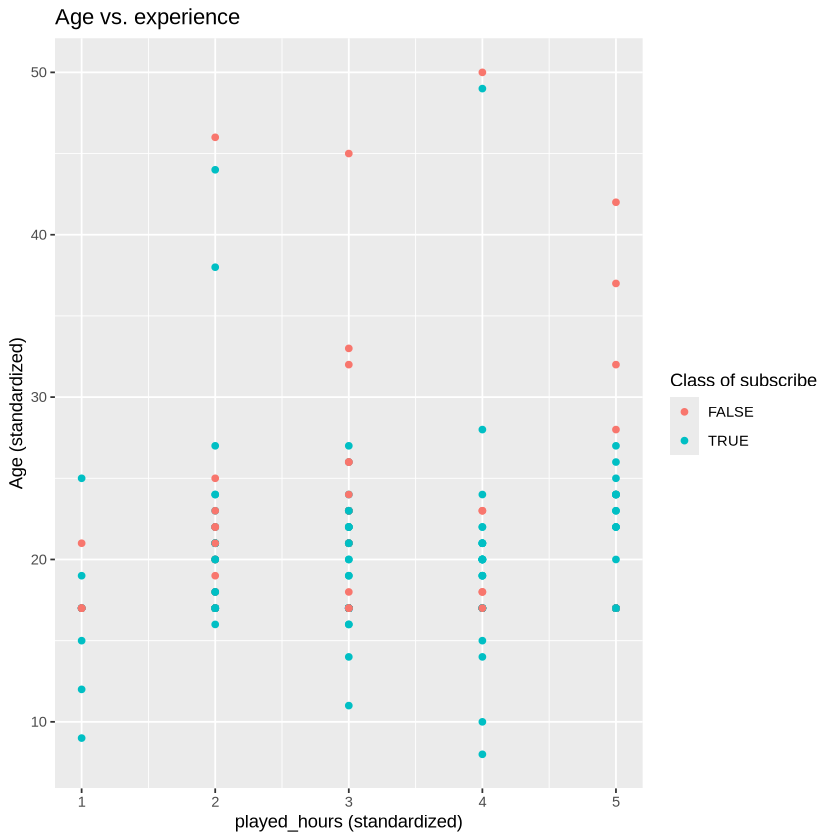

In [10]:
experience_Age_plot <- newest_players |>
   ggplot(aes(x = experience, y = Age, color = subscribe)) + 
   geom_point() + 
   xlab("played_hours (standardized)") +
   ylab("Age (standardized)") +
   ggtitle("Age vs. experience") +
   labs(color = "Class of subscribe")

experience_Age_plot

In [11]:
minecraft_split <- initial_split(newest_players, prop = 0.75, strata = subscribe)  
minecraft_train <- training(minecraft_split)   
minecraft_test <- testing(minecraft_split)

In [12]:
minecraft_recipe <- recipe(subscribe ~ experience + Age +  played_hours, data = newest_players) |>
   step_scale(experience, Age, played_hours) |>
   step_center(experience, Age, played_hours)

In [13]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
      set_engine("kknn") |>
      set_mode("classification")

minecraft_fit <- workflow() |>
      add_recipe(minecraft_recipe) |>
      add_model(knn_spec) |>
      fit(data = newest_players)

minecraft_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3247423
Best kernel: rectangular
Best k: 3